In [109]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [111]:
#Loading data tarining dataset 
data = pd.read_csv("train_BRCpofr.csv")

In [112]:
#viewing columns and structure of the dataset 
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [113]:
#Checking for missing values 
data.isnull().sum()


id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

**Observation** : There were no missing values in the dataset

In [114]:
#Removing Column - since it is just uqique identification of the policy holders 
data.drop(['id'],inplace = True, axis = 1)

In [115]:
#checkin dataset 
data.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


#  **Explanatory Data Analysis**

Checking the distribution of  Target variable - 'cltv'


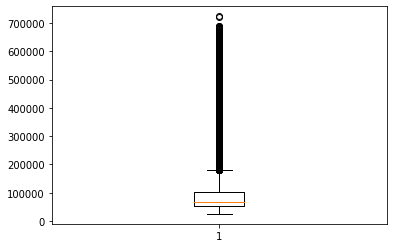

In [116]:
#boxplot for target variable 
box = plt.boxplot(data = data , x = 'cltv')

**Observation:** There are outliers in the target variable and it is positively skewed


**Action:** We remove the Outliers from the target variable. We choose to draw insight and model the target variable except the outliers

In [117]:
#checking for fillers - starting range for the outliers
for key in box:
    print(f'{key}: {[item.get_ydata() for item in box[key]]}\n')

whiskers: [array([52836., 24828.]), array([103440., 179340.])]

caps: [array([24828., 24828.]), array([179340., 179340.])]

boxes: [array([ 52836.,  52836., 103440., 103440.,  52836.])]

medians: [array([66396., 66396.])]

fliers: [array([515400, 348768, 238920, ..., 277056, 276348, 199056])]

means: []



In [118]:
#Removing the outliers 
data_new = data[ (data['cltv']<200000)]

Visualizing the categorical independent varibale with respect to the target variable to check their dependence using a distribution plot. 

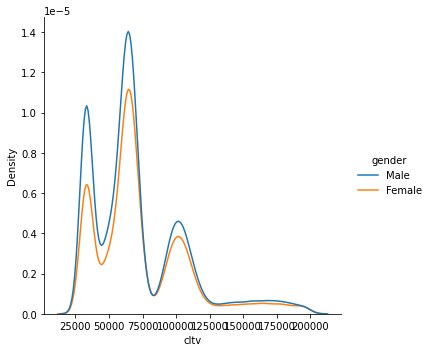

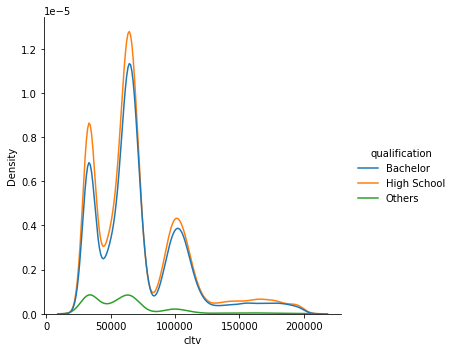

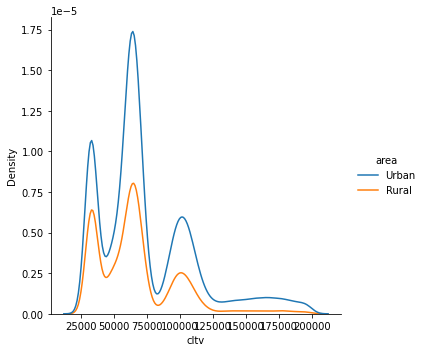

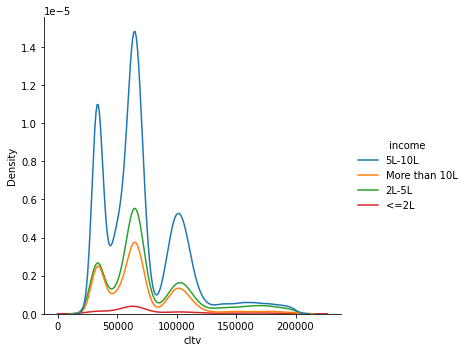

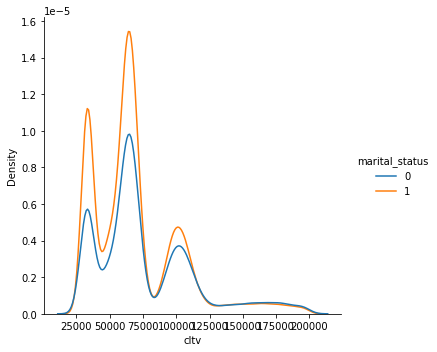

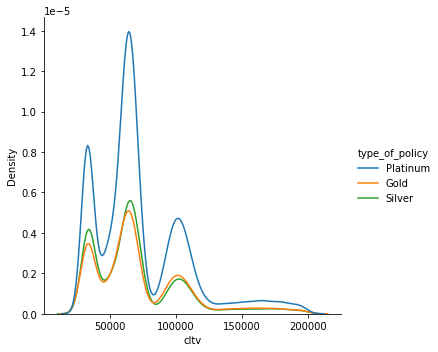

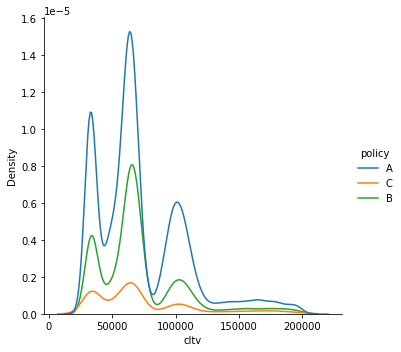

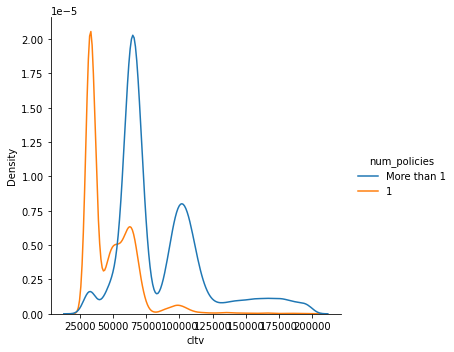

In [119]:
for i in ['gender','qualification','area','income','marital_status','type_of_policy','policy','num_policies']:
  sns.displot(data=data_new, x="cltv", hue=i, kind="kde")

**Observation:**



1.   All the categories in the variables - gender, qulaification,income, marital_status, type_of_policy, policy have the same distribution overall. 
2.   Variable num_of_policy - shows that customers having more number of policies have higher life time value (cltv)



Visualizing the numerical independent varibales with respect to the target variable (cltv) to check their dependence using a scatter plot.

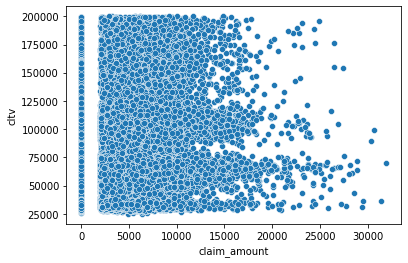

In [120]:
sns.scatterplot(data=data_new, x="claim_amount", y='cltv')

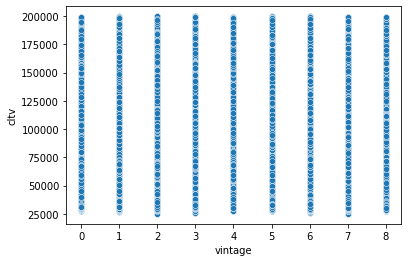

In [122]:
sns.scatterplot(data=data_new, x="vintage", y='cltv')

**Observation:** We observe that variable vintage and claim_amount are completely independent to the target variable (cltv).

**Action:** We remove these variables since they will not bring any additional to the model explanation

In [123]:
#removing the variables 
data_new.drop(columns = ['vintage','claim_amount'], inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## **Data Preprocessing**



1.   Separating Target and independent variables 
2.   One hot encoding of the categorical independent variables with drop first method (hence for each categorical variables with n factors we will have n-1 new variables)



In [137]:
#Creating Separate dataframes for target and independent variables
Y = data_new['cltv']


X = data_new.loc[:, data_new.columns != 'cltv']



In [128]:
#one hot encoding with drop first method
data_encoded= pd.get_dummies(X               
               ,columns = ['gender','qualification','area','income','marital_status','type_of_policy','policy','num_policies']
               ,drop_first = True
               )

In [129]:
#resetting index 
data_encoded.reset_index(inplace = True , drop = True)
data_encoded.head()


,gender_Male,qualification_High School,qualification_Others,area_Urban,income_5L-10L,income_<=2L,income_More than 10L,marital_status_1,type_of_policy_Platinum,type_of_policy_Silver,policy_B,policy_C,num_policies_More than 1
0,1,0,0,1,1,0,0,1,1,0,0,0,1
1,1,0,0,1,1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,1,1,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0,1,0,0,1


## **Applying Machine Learning Models**


*   Random Forest Regressor is applied since the variables are mostly categorical
*   We are using bootstrap samples and out of bag score to check the performance on tarining data, so we are not applying cross validation. 


In [130]:
#building a simple random forest regressor model with just number of trees ensemble = 1000
regr_1 = RandomForestRegressor(n_estimators = 1000, random_state=67, bootstrap=True, oob_score= True)

In [131]:
#Fitting the data 
regr_1.fit(data_encoded,Y)

<ipython-input-131-6bad45e868bb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr_1.fit(data_encoded,Y)


RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=67)

In [132]:
#Checking the performance of the model
regr_1.oob_score_


0.27287323956108145

In [134]:
#checking the freature importance from the model 
print(regr_1.feature_importances_)
print(regr_1.feature_names_in_)

[0.01048338 0.00987313 0.00717704 0.01943165 0.00822684 0.00428801
 0.00774877 0.01035229 0.00936795 0.00921266 0.00627573 0.00709404
 0.89046853]
['gender_Male' 'qualification_High School' 'qualification_Others'
 'area_Urban' 'income_5L-10L' 'income_<=2L' 'income_More than 10L'
 'marital_status_1' 'type_of_policy_Platinum' 'type_of_policy_Silver'
 'policy_B' 'policy_C' 'num_policies_More than 1']


**Observation:** From variable importance we observe that - gender, area, marital_status, num_of_policiy are contributing mostly to the model. 

**Action:** We keep only the above variables and train the data again to check the performance similarly. 

In [135]:
X_2 = data_encoded[['gender_Male','area_Urban','marital_status_1','num_policies_More than 1']]

In [138]:
#building a simple random forest regressor model 2 with just number of trees ensemble = 1000
regr_2 = RandomForestRegressor(n_estimators = 1000, random_state=67, bootstrap=True, oob_score= True)

In [139]:
regr_2.fit(X_2,Y)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=67)

In [140]:
#checking the performance of the updated model
regr_2.oob_score_

0.2801923878791346

**Observation:** We see an improvement of 2.7 % in the model performance. 


In [141]:
#creating y_pred whcih are the out of bag prediction results
y_pred = pd.DataFrame(regr_2.oob_prediction_)


In [142]:
 #checking the r2_score for training data
 r2_score(Y, y_pred)

0.2801923878791346

## Importing Test Data 


1.   Now we import test dataset - which is completely unseen to the model
2.   Perform the same Data Preprocessing stpes to the data
3. Predict the life time values using  our final model - 'regr_2'
4. Saving it as csv with the respective ids. 



In [143]:
#importing the data
data_test = pd.read_csv("test_koRSKBP.csv")
data_test.shape

(59595, 11)

In [144]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [145]:
#creating a separaete id dataframe
#Keeping only the necessary columns for predicting
id = pd.DataFrame(data_test['id'])
data_test.drop(columns = ['id','vintage','claim_amount','qualification','income','type_of_policy','policy'],inplace = True)

In [146]:
#Applying one hot encoding to the test dataframe
test_encoded = pd.get_dummies(data_test
               ,columns = ['gender','area','marital_status','num_policies']
               ,drop_first = True
               )

In [147]:
#Predicting Target values with the final model = 'regr_2'
Y_predict_test = pd.DataFrame(regr_2.predict(test_encoded))


In [154]:
#renaming column
Y_predict_test.columns = ['cltv']
Y_predict_test.head()

,cltv
0,83330.456255
1,90946.423020
2,79475.607569
3,79842.031324
4,90946.423020


In [155]:
#Creating final dataset with id and predictions 
final = pd.concat([id,Y_predict_test],axis = 1)


In [156]:
final.head()

,id,cltv
0,89393,83330.456255
1,89394,90946.423020
2,89395,79475.607569
3,89396,79842.031324
4,89397,90946.423020


In [157]:
#saving csv file as output
from google.colab import files
final.to_csv('final_submission.csv', encoding = 'utf-8-sig', index = False) 
files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>